<a href="https://colab.research.google.com/github/leodenale/sfs-python/blob/master/doc/examples/modal-room-acoustics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modal Room Acoustics

In [1]:
# Install sfs package
!pip install sfs

     |████████████████████████████████| 71kB 3.2MB/s 


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sfs

In [0]:
%matplotlib inline

In [0]:
x0 = 1, 3, 1.80  # source position
L = 6, 6, 3  # dimensions of room
deltan = 0.01  # absorption factor of walls
N = 20  # maximum order of modes

You can experiment with different combinations of modes:

In [0]:
#N = [[1], 0, 0]

## Sound Field for One Frequency

In [0]:
f = 500  # frequency
omega = 2 * np.pi * f  # angular frequency

In [0]:
grid = sfs.util.xyz_grid([0, L[0]], [0, L[1]], L[2] / 2, spacing=.1)

In [0]:
p = sfs.fd.source.point_modal(omega, x0, grid, L, N=N, deltan=deltan)

For now, we apply an arbitrary scaling factor to make the plot look good

TODO: proper normalization

In [0]:
p *= 0.05

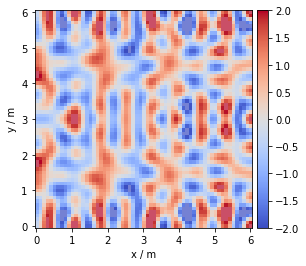

In [10]:
sfs.plot2d.amplitude(p, grid);

## Frequency Response at One Point

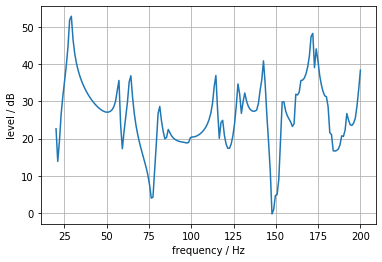

In [11]:
f = np.linspace(20, 200, 180)  # frequency
omega = 2 * np.pi * f  # angular frequency

receiver = 1, 1, 1.8

p = [sfs.fd.source.point_modal(om, x0, receiver, L, N=N, deltan=deltan)
     for om in omega]
     
plt.plot(f, sfs.util.db(p))
plt.xlabel('frequency / Hz')
plt.ylabel('level / dB')
plt.grid()